In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# I am following Ken Jee Beginner Kaggle Data Science Project Walk-Through (Titanic) on YouTube (credit) for learning purposes

# importing Seaborn and MPL
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
training = pd.read_csv("/kaggle/input/titanic/train.csv")
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testing = pd.read_csv("/kaggle/input/titanic/test.csv")
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# read the training & testing data in above, organizing the training & testing it here
# we are initializing a column train_test so that we can split out the training (=1) and testing (=0) later once preprocessing is complete
training['train_test'] = 1
testing['train_test'] = 0
testing['Survived'] = np.NaN # this blanks out the survived result (y) in the testing data which we shouldn't have access to anyway

all_data = pd.concat([training, testing])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
women = training.loc[training.Sex == 'female']['Survived']
survival_women = sum(women)/len(women)

print("Survival Rate of Women onboard:", survival_women * 100, "%")

Survival Rate of Women onboard: 74.20382165605095 %


In [6]:
men = training.loc[training.Sex == "male"]['Survived']
survival_men = sum(men)/len(men)

print("Survival Rate of Men onboard:", survival_men * 100, "%")

Survival Rate of Men onboard: 18.890814558058924 %


In [7]:
# Understand nature of the data .info() .describe() good starting points
# histograms and box plots
# missing data? e.g. fare = 0, did some people get on for free?
# correlations between metrics
# interesting themes e.g. wealthy survive, age related to ticket price? were there young and wealthy cohorts?
# feature engineering (?)
# preprocess data or use a transformer?
# use label for train and test

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
#lots of null values for Cabin - assuming 3rd class did not get a cabin

In [10]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [11]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [12]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Ticket','Cabin', 'Embarked']]
#manually define these as separate variable types for annalysis

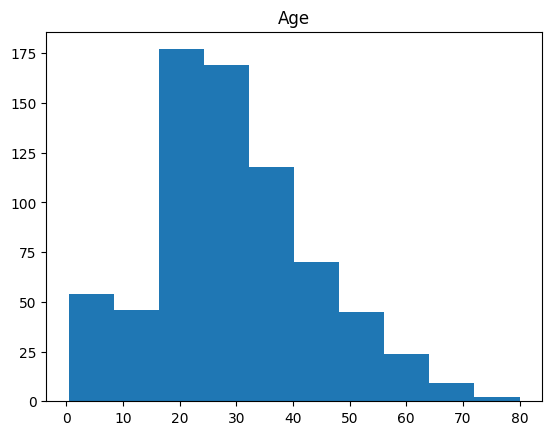

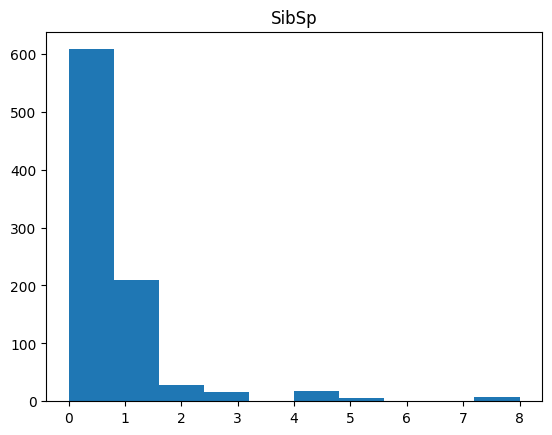

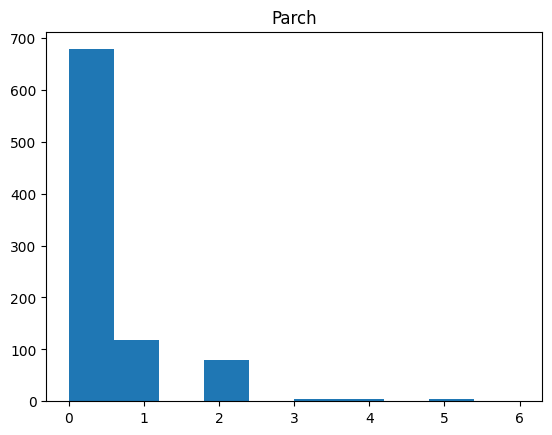

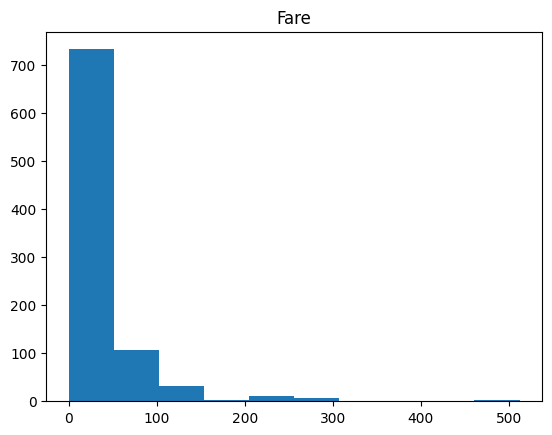

In [13]:
for category in df_num.columns:
    plt.hist(df_num[category])
    plt.title(category)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

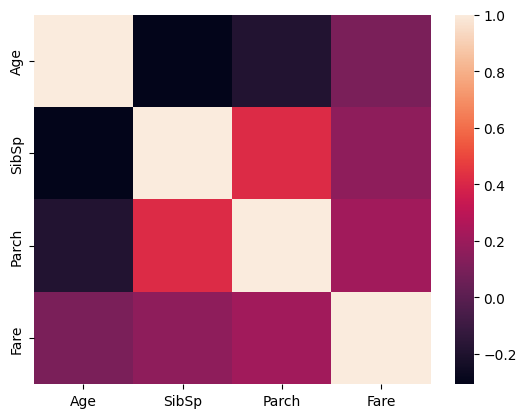

In [14]:
print(df_num.corr())
sns.heatmap(df_num.corr())


In [15]:
# compare survival rate across age, sibsp, parch and fare
pd.pivot_table(training, index="Survived", values= ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


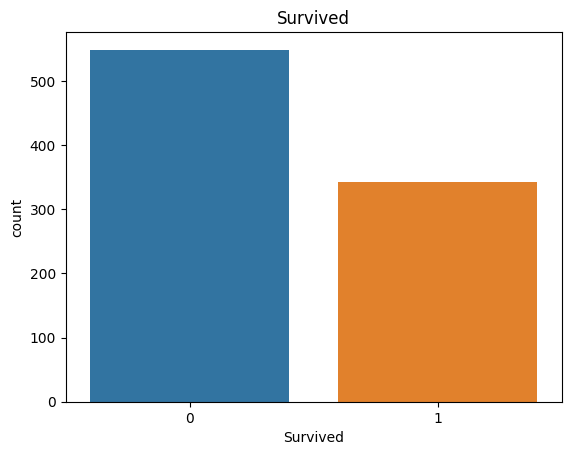

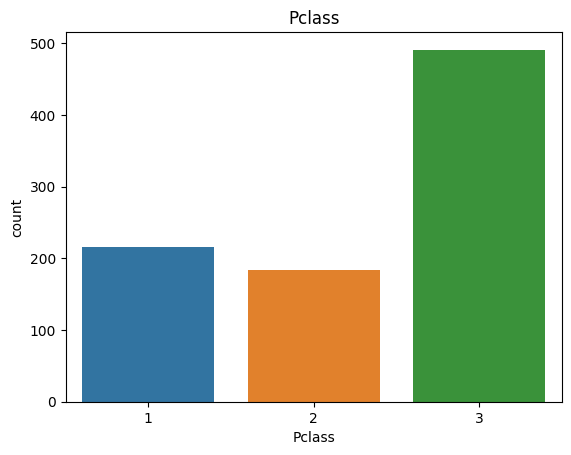

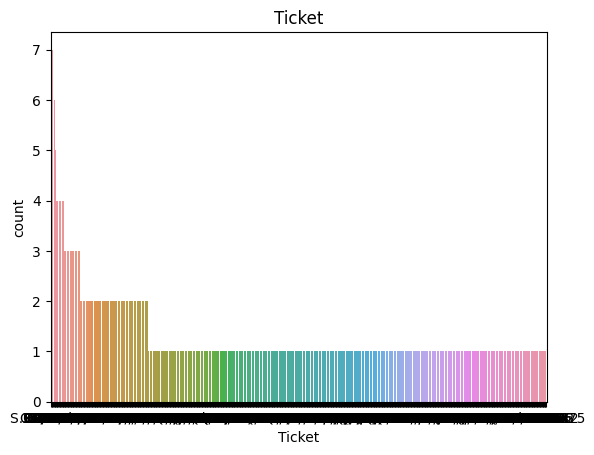

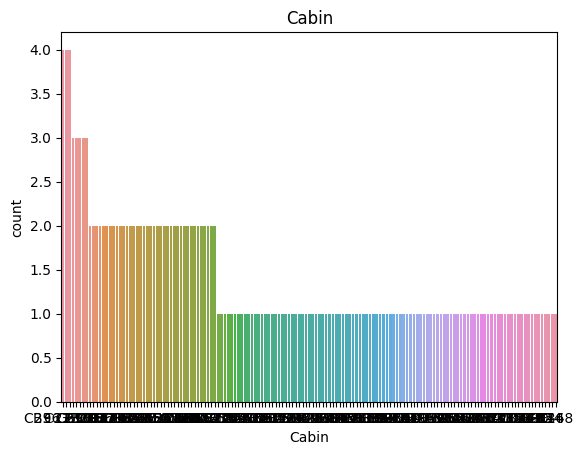

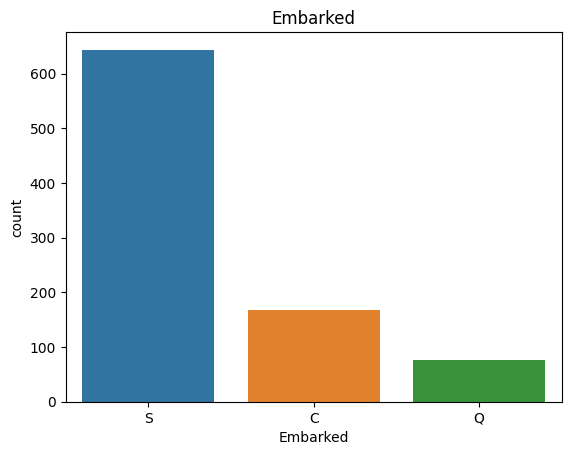

In [16]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()

In [17]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [18]:
#example of Feature engineering - did a person have multiple cabins (super upper class??)
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

Above, we were defining a new category for multiple cabins - if we expect class is a predictor of survivability then what about super upper class, such that they had multiple cabins?

In [19]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values= 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
# create a variable to see the first letter of the cabin class - what types of cabins are there? null value can be its own category

training["cabin_cat"] = training.Cabin.apply(lambda x: str(x)[0])

In [21]:
print(training.cabin_cat.value_counts(), "\n\n")
pd.pivot_table(training, index="Survived", columns="cabin_cat", values ="Name", aggfunc="count")

cabin_cat
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64 




cabin_cat,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


We can try to use the Cabin type above as a meaningful categorical variable, there is a clearly higher survival rate if you had one of the cabins (with the exception of class A)

In [22]:
#ticket values understanding - some have numbers only, some have letters too
training["numeric_ticket"] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0) # create numeric_ticket variable as 1 if entire value is numeric
training["ticket_letters"] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [23]:
training.numeric_ticket.value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

Above: most have a purely numeric ticket code but around 25% have letters, explored below

In [24]:
training.ticket_letters.value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

Nothing really standing out from these letters, soton appears a lot because it was the main point of embarkation but that's about it

In [25]:
# did the numeric ticket have an impact on survival rate?
pd.pivot_table(training,index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [26]:
pd.pivot_table(training, index="Survived", columns="ticket_letters", values="Ticket", aggfunc="count")

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


No real intelligence from the above^

In [27]:
# what about titles of people?
training['salutation'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
# split(,)[1] because the names always start with the surname, we take after the comma e.g. Doherty, MR. THOMAS
#split(.)[0] because the salutation is the first section of [1] already taken e.g. MR. Thomas

In [28]:
training["salutation"].value_counts()

salutation
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

# What does preprocessing for a model look like?

Preprocessing of the data set to do:
* Drop null values, for example a couple in Embarked
* include only relevant variables, drop passenger ID & Name. Important variables may be Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, cabin_cat, cabin_multiple, numeric_ticket, salutation
* categorical transforms (get dummies from Pandas) e.g. for each individual cabin type A - G it must be turned into a binary 0 or 1 if a passenger was in a particular cabin type. that's how the model can incorporate categorical variables
* provide a mean value for fare and age
* normalize fare using logarithm (??)

(889,)

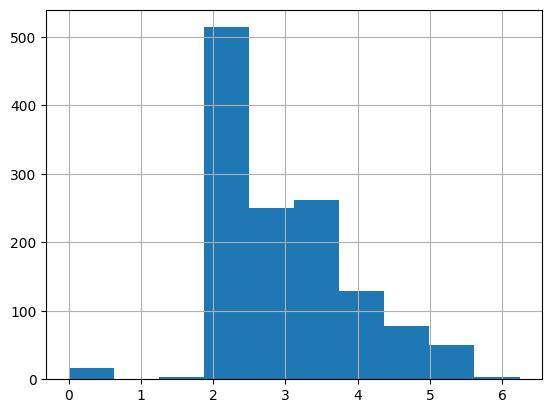

In [29]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_cat'] = all_data.Cabin.apply(lambda x: str(x)[0]) #getting the 0th index of the string of cabin category e.g. the letter A-G
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0) # if the ticket is purely numeric
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
# ^ this line: create one string of the letters in the ticket code without spaces or . or / before the numeric code at the end of the ticket code
all_data['salutation'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
# ^ this line: names are written out as Doherty, Mr. Thomas so we split and take after the comma, then split and take before the full stop for the salutation

# add mean value where there's gaps in data
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
# when data isn't normally distributed, you might want to use the median and not the mean

# drop the null embarked x 2 in training
all_data.dropna(subset=['Embarked'], inplace = True)

# normalize the fare with logarithm
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#class converted to category
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_cat', 'cabin_multiple', 'numeric_ticket', 'salutation', 'train_test']])

# preprocessing complete, split out training vs testing again back to original and drop the train_test category, it was just used to sort them anyway
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape


In [30]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1) # the training data scaled
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1) # the testing data scaled

y_train = all_data[all_data.train_test == 1].Survived # this is the survived column of the training data


A few models being tried out: Naive Bayes, Logistic Regression, Decision Tree and Random Forests, K Nearest Neighbour (?), Support Vector Classifier,  Xtreme Gradient Boosting, Soft Voting Classifier

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [32]:
#Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [33]:
# logistic regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [34]:
# logistic regression - appears that scaled X_training data has no effect
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [35]:
#decision tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())


[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
0.776207706468609


In [36]:
#decision tree scaled
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.7739541674601662


In [37]:
# k nearest neighbor
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.76966292 0.80898876 0.80337079 0.81460674 0.83615819]
0.8065574811147084


In [38]:
# k nearest neighbor scaled
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


In [39]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.8065638291119152


In [40]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.8054402336062972


In [41]:
#SVC without scaling data was 73% - poor, scaled is 83%
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.79775281 0.85955056 0.79775281 0.81355932]
0.8166444486764426


In [43]:
# voting classifier can be HARD or SOFT. Hard will give a YES or NO (1 or 0) vote and 
# then it's just a popular vote (i.e. each model saying survive or not survive)
# SOFT averages each model, if average confidence is >50% it registers a yes (1) and will do this to predict the survival of each passenger

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr),('gnb', gnb), ('knn', knn), ('rf', rf),('svc', svc), ('xgb', xgb)], voting = 'soft')

In [44]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.83146067 0.80337079 0.85310734]
0.8268012442074527


In [45]:
from sklearn.ensemble import RandomForestClassifier

y = training["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(training[features])
X_test = pd.get_dummies(testing[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': testing.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your Submission was successfully saved!")

Your Submission was successfully saved!
